In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("kidney_disease.csv")
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


Rename the column with the hrlp of the data description text

In [3]:
col = pd.read_csv("data_description.txt" , sep = '-')

In [4]:
col.reset_index(inplace=True)
col.columns = ['index' , 'columns']

In [5]:
data.columns = col["columns"].values

In [6]:
df = data.copy()

In [7]:
df.drop('id',axis = 1,inplace = True)

## Cleaning process
**1. Incorrect(data type) 2.Incomplete  3. Inconsistent(cat unique features) 4. outlier, out of range 5. duplicates **

**1. data type**

In [8]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
classification              object
dtype: object

In [9]:
pd.set_option("display.max_columns",30)

In [10]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


"packed_cell_vol" is object but it should be int

"white_blood_cell_count" is object but it should be int

"red_blood_cell_count" is object but it should be int


In [11]:
incorrect_dtypes=['red_blood_cell_count','packed_cell_volume','white_blood_cell_count']

In [12]:
def convert_to_int(col):
    df[col] = pd.to_numeric(df[col] , errors = 'coerce')

In [13]:
for col in incorrect_dtypes:
    convert_to_int(col)

In [14]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
classification              object
dtype: object

### 1. Incomplete

In [15]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [16]:
def missing_percentage(df):
    print(((df.isnull().sum()*100)/len(df)).sort_values(ascending = False))
 

In [17]:
missing_percentage(df)

red_blood_cells            38.00
red_blood_cell_count       32.75
white_blood_cell_count     26.50
potassium                  22.00
sodium                     21.75
packed_cell_volume         17.75
pus_cell                   16.25
haemoglobin                13.00
sugar                      12.25
specific_gravity           11.75
albumin                    11.50
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
blood_pressure              3.00
age                         2.25
bacteria                    1.00
pus_cell_clumps             1.00
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
anemia                      0.25
appetite                    0.25
pedal_edema                 0.25
classification              0.00
dtype: float64


**Removing Rows**

In [18]:
# missing_values = ((df.isnull().sum()*100)/len(df)).reset_index()
# list_of_missing_values = missing_values['index'].values

In [19]:
#removing_row_names1 = [col for col in list_of_missing_values if ]

In [20]:
removing_row_col_names = ["blood_urea","serum_creatinine","blood_pressure"  ,
                      "age","bacteria","pus_cell_clumps","hypertension"
                      ,"diabetes_mellitus","coronary_artery_disease" ,
                      "anemia","appetite","pedal_edema"]

In [21]:
def remove_row(col):
    df.dropna(subset = [col],inplace = True)

In [22]:
for name in removing_row_col_names:
    remove_row(name)

In [23]:
missing_percentage(df)

red_blood_cells            37.746479
red_blood_cell_count       30.704225
white_blood_cell_count     25.070423
potassium                  19.436620
sodium                     19.154930
packed_cell_volume         16.338028
pus_cell                   14.647887
sugar                      12.112676
specific_gravity           11.830986
haemoglobin                11.830986
albumin                    11.267606
blood_glucose_random        7.605634
blood_pressure              0.000000
pus_cell_clumps             0.000000
bacteria                    0.000000
classification              0.000000
blood_urea                  0.000000
serum_creatinine            0.000000
anemia                      0.000000
hypertension                0.000000
diabetes_mellitus           0.000000
coronary_artery_disease     0.000000
appetite                    0.000000
pedal_edema                 0.000000
age                         0.000000
dtype: float64


**Filling rows by random imputation**

In [24]:
filling_col_names = ["red_blood_cells","red_blood_cell_count",
                     "white_blood_cell_count","potassium","sodium",
                     "packed_cell_volume","pus_cell",
                     "haemoglobin","sugar","specific_gravity",
                     "albumin","blood_glucose_random"]

In [25]:
cat_names = [col for col in df.columns if df[col].dtype == 'object']
num_names = [col for col in df.columns if df[col].dtype != 'object']

In [26]:
#df["red_blood_cells"][df["red_blood_cells"].isnull()] = df["red_blood_cells"].dropna().sample(len(df["red_blood_cells"][df["red_blood_cells"].isnull()]))

In [27]:
def random_imputation(df,col):
    random_values = df[col].dropna().sample(df[col].isnull().sum())
    random_values.index = df[df[col].isnull()].index
    df.loc[df[col].isnull(),col] = random_values
    

In [28]:
for col in filling_col_names:
    random_imputation(df,col)

In [29]:
missing_percentage(df)

classification             0.0
serum_creatinine           0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
sodium                     0.0
anemia                     0.0
potassium                  0.0
haemoglobin                0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
pedal_edema                0.0
age                        0.0
dtype: float64


**so now the df is cleaned let's check the distribution of before and after imputation by comparing data and df**

In [30]:
num_names

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


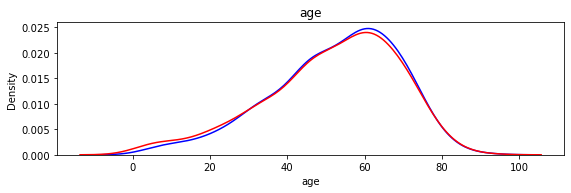

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


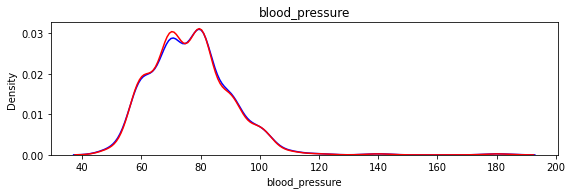

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


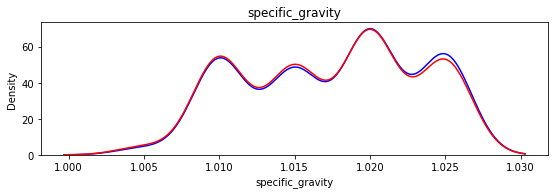

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


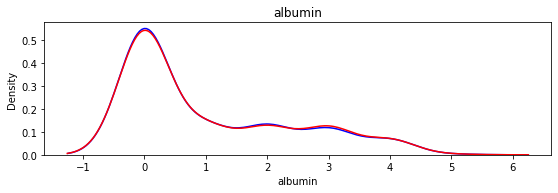

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


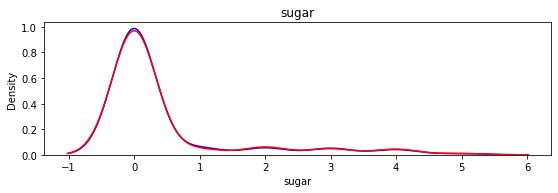

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


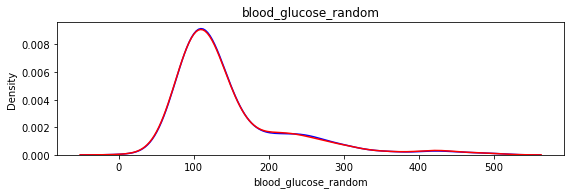

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


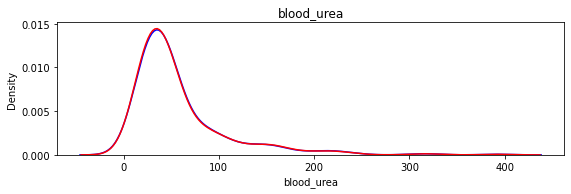

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


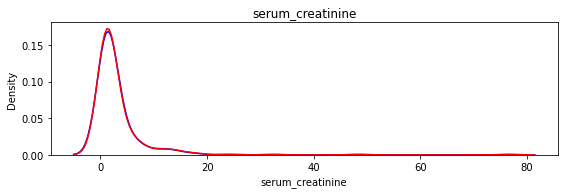

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


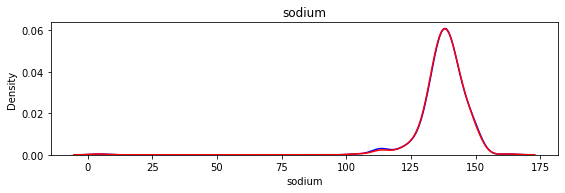

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


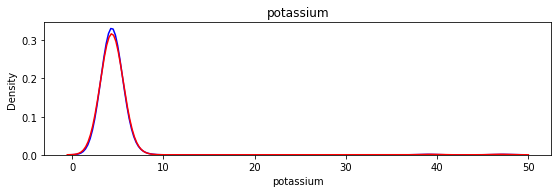

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


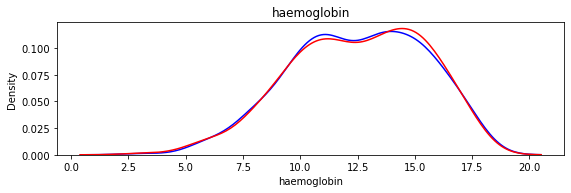

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '\t?'

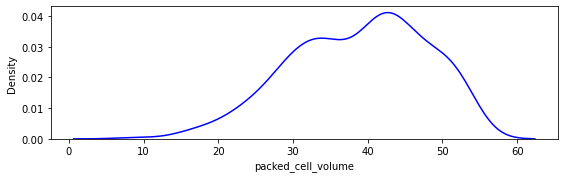

In [31]:

for i,col in enumerate(num_names):
    plt.figure(figsize = (20,20))
    plt.subplot(7,2,i+1)
    sns.distplot(df[col],hist = False,color = 'blue')
    sns.distplot(data[col],hist = False,color = 'red')
    plt.title(col)
    plt.show()

**before and after imputation distribution is approximately same**

### lets check for cat_feature

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


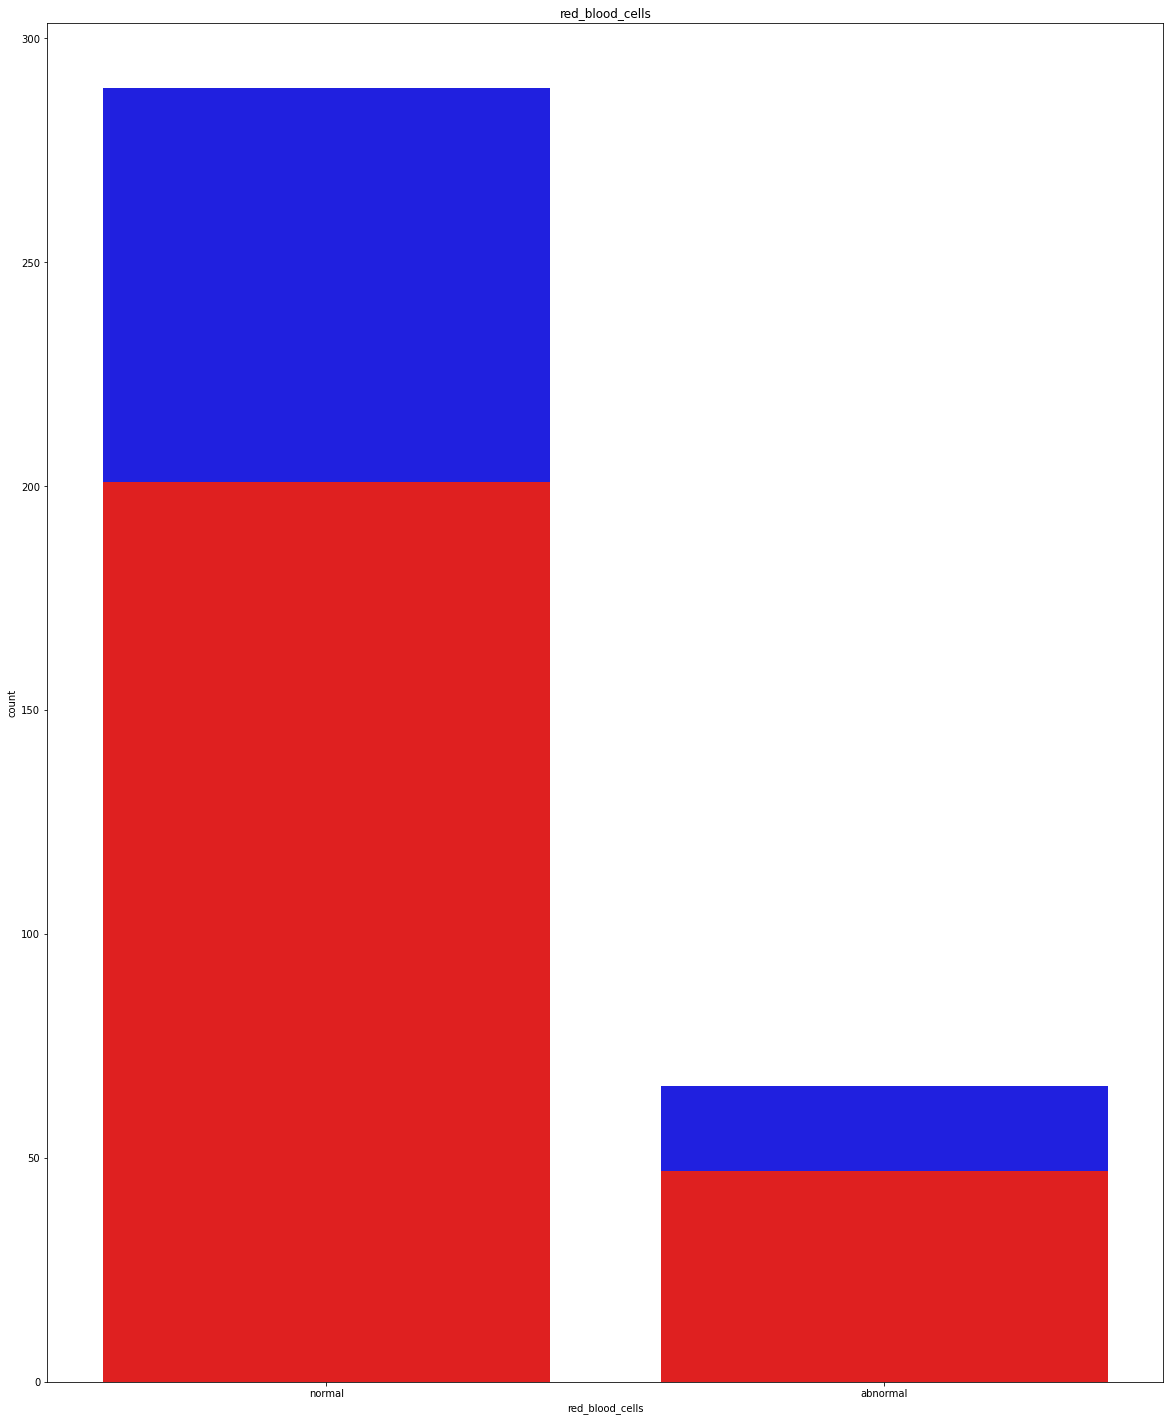

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


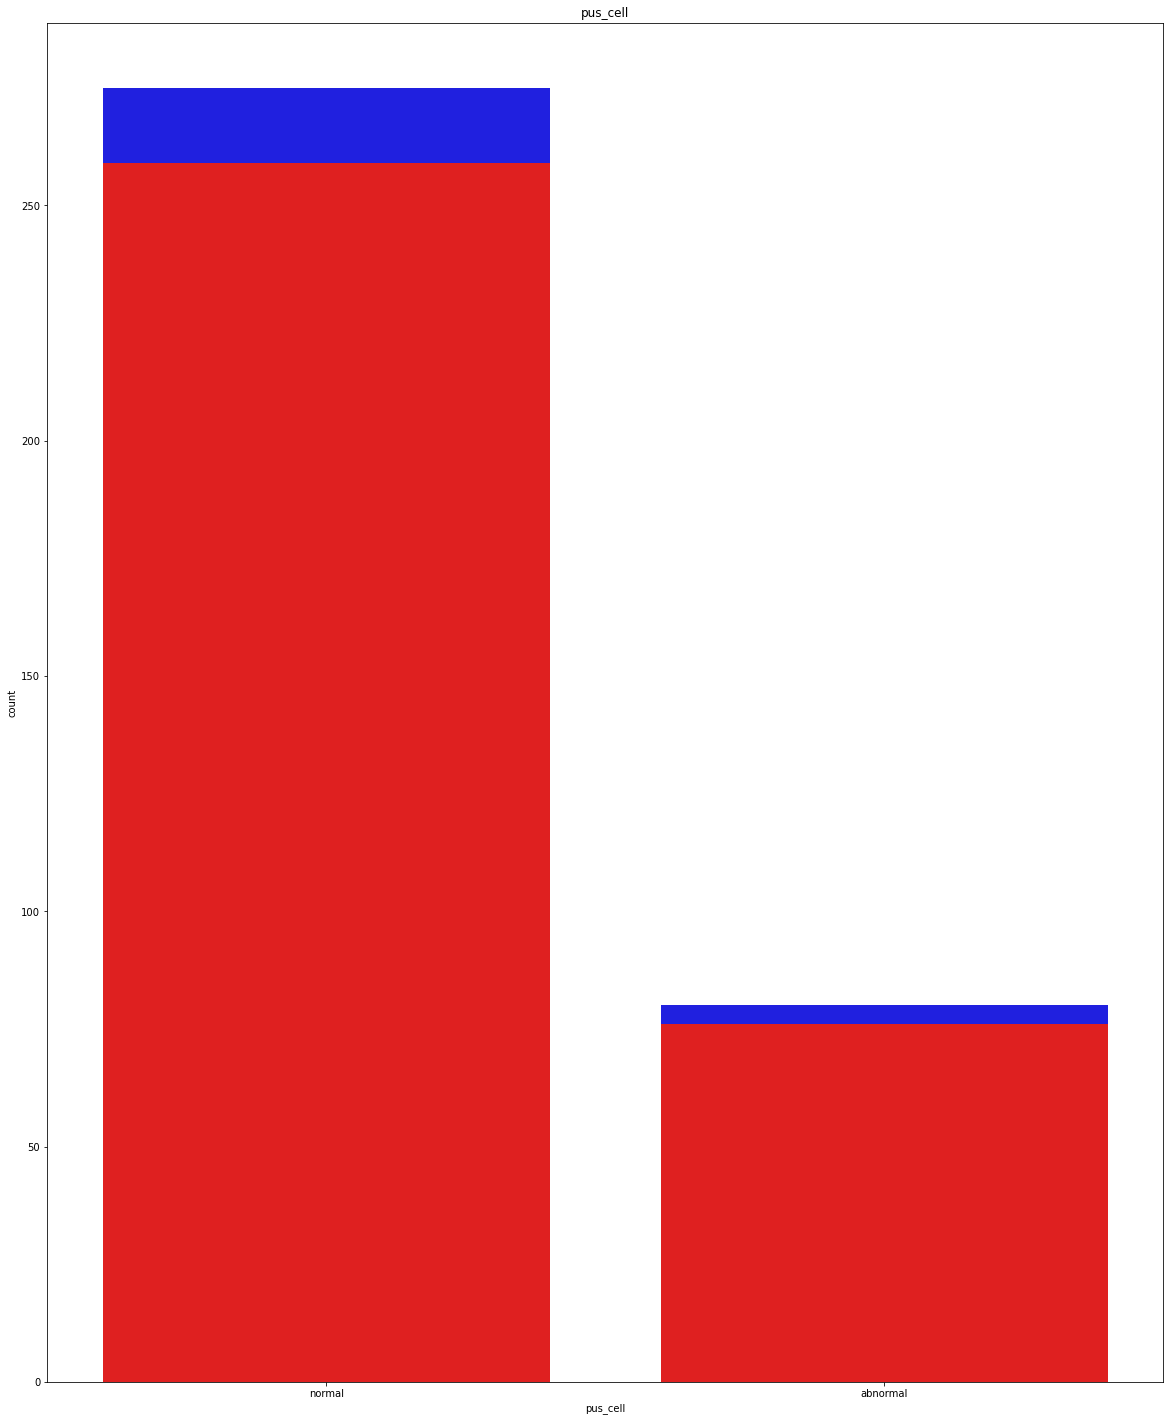

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


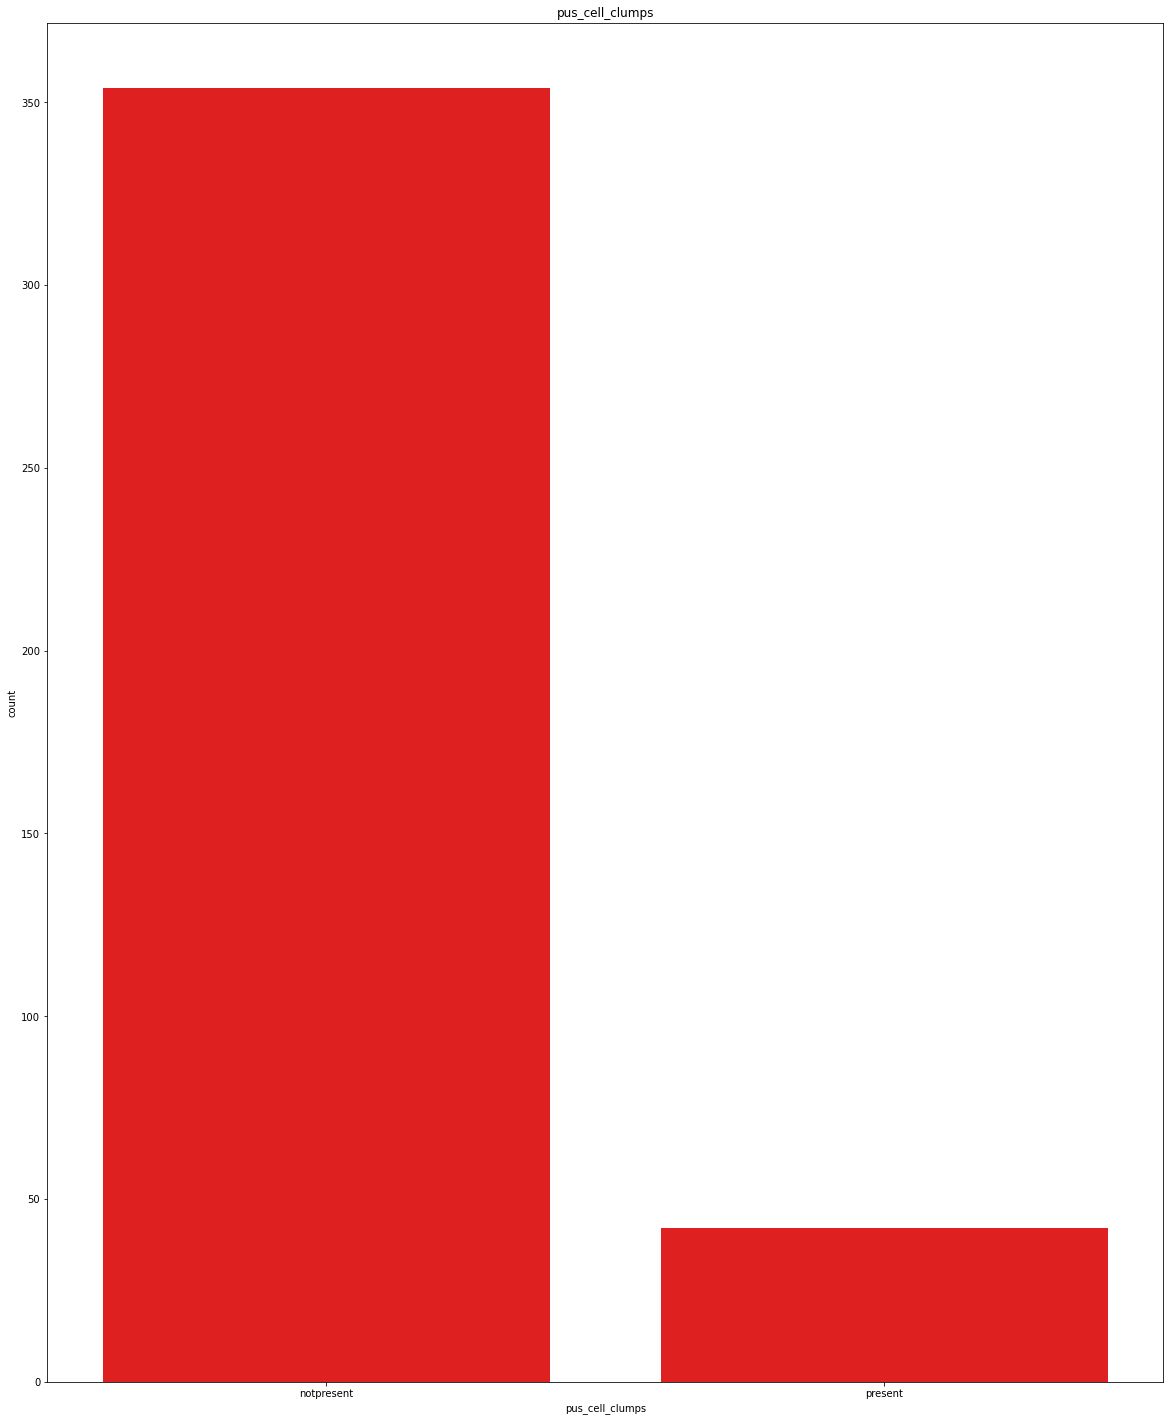

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


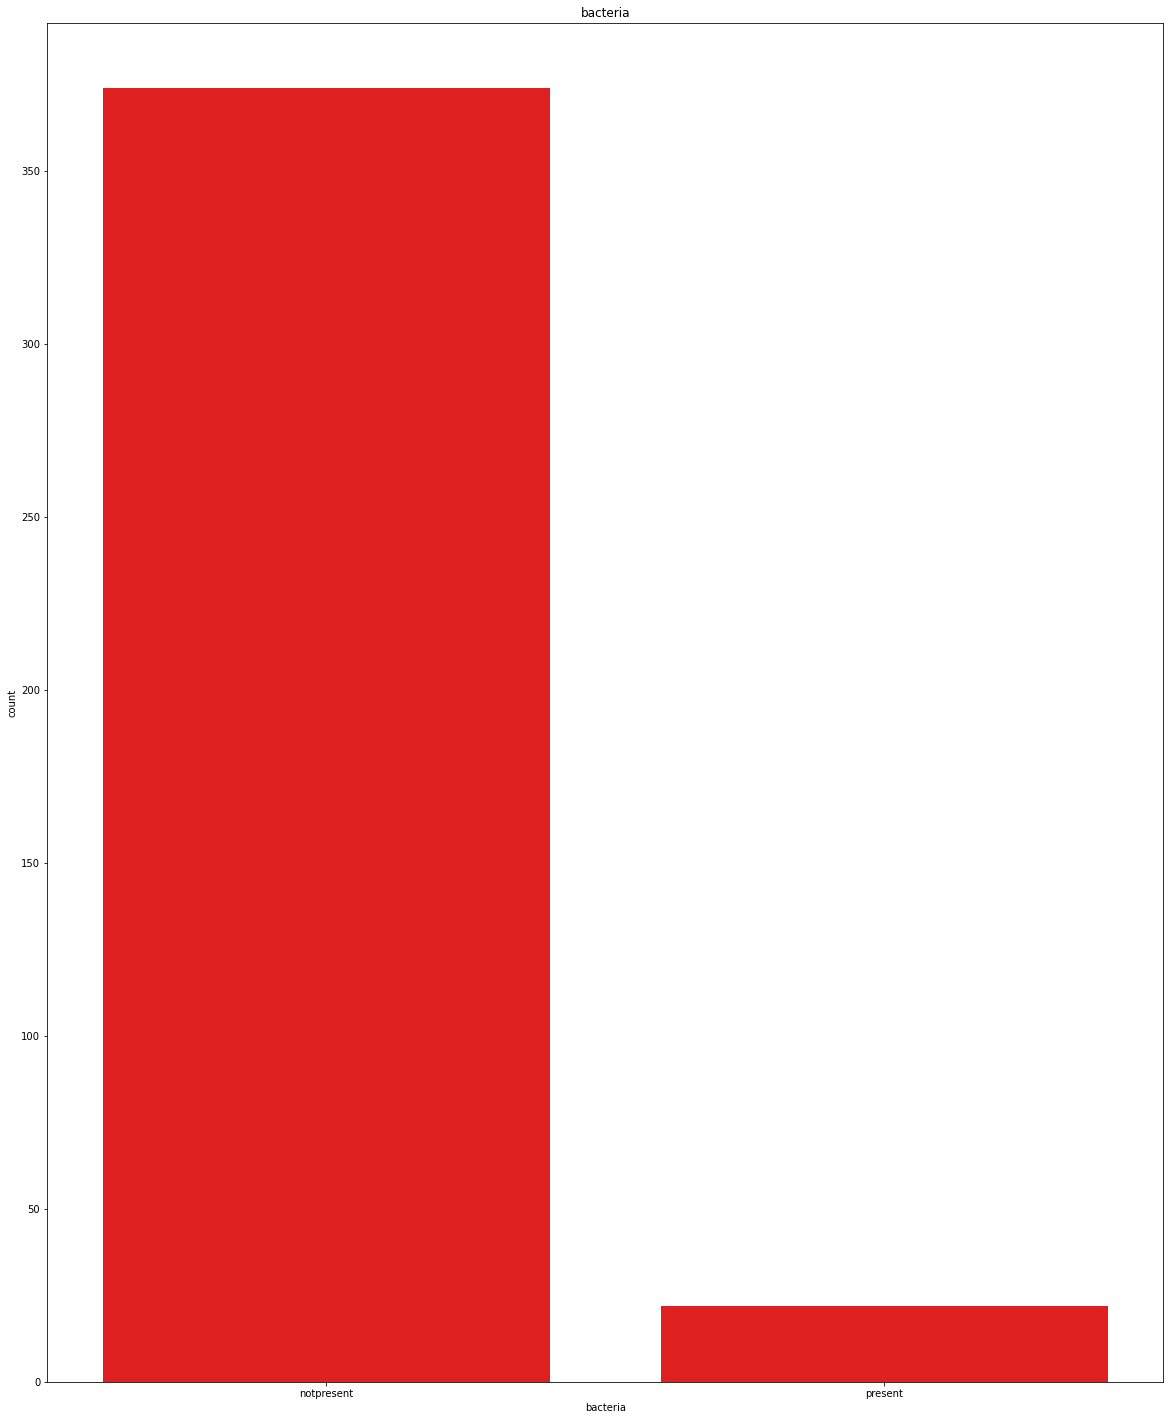

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


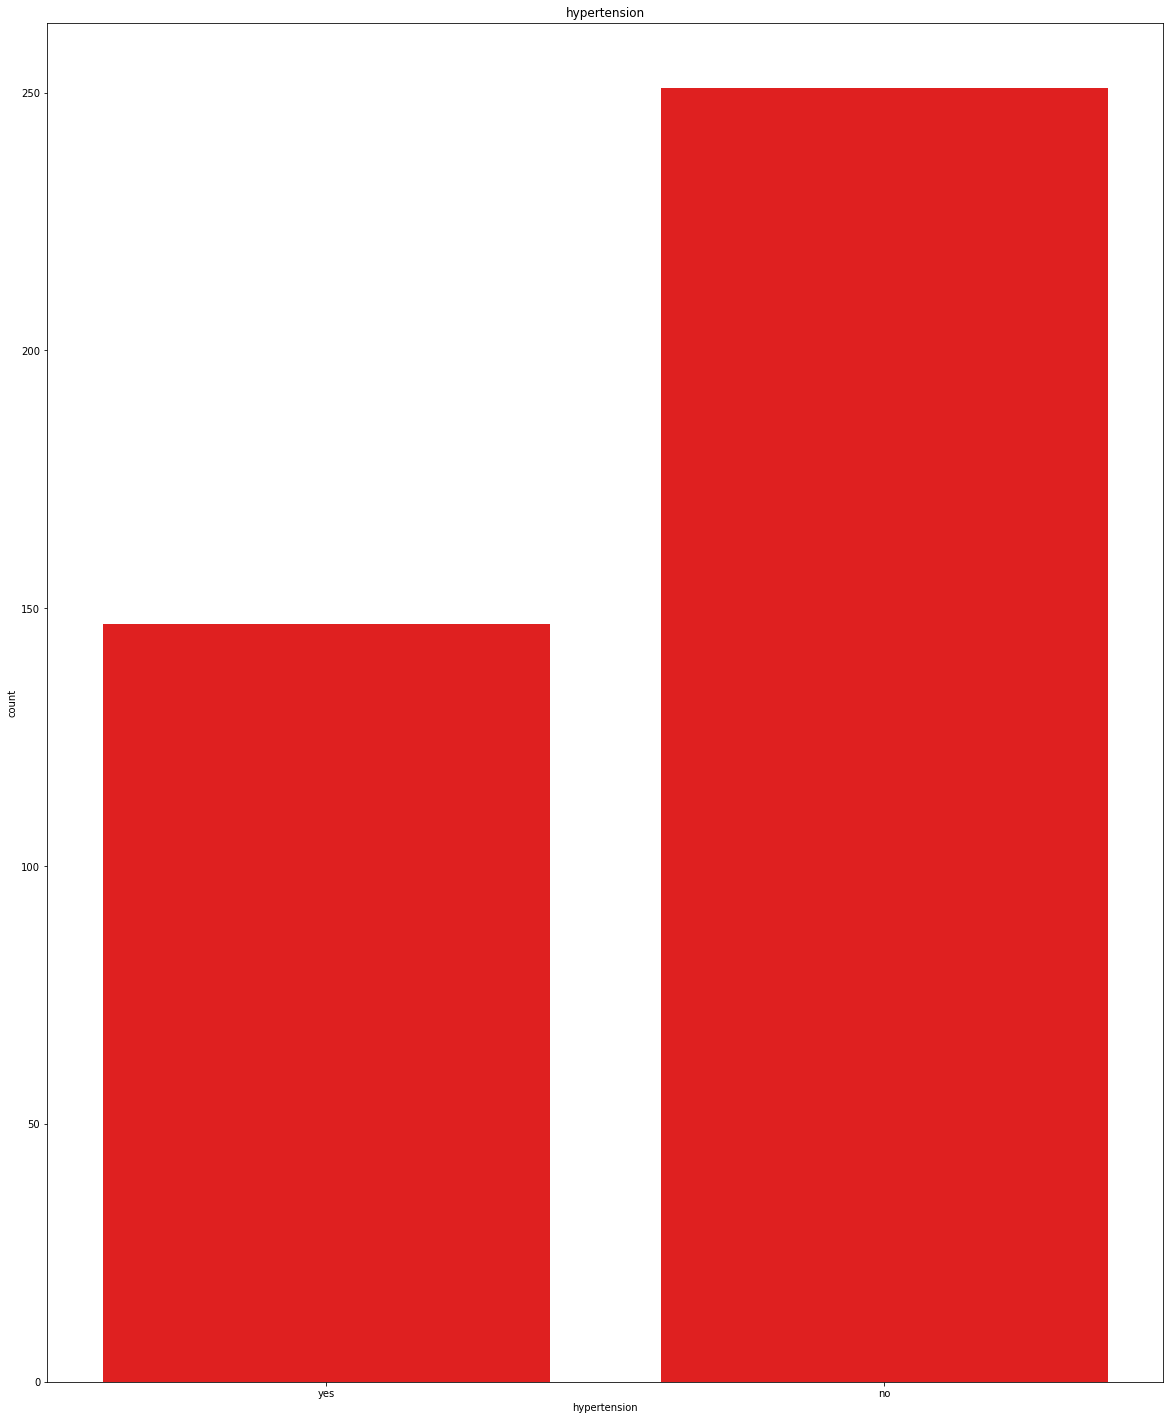

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


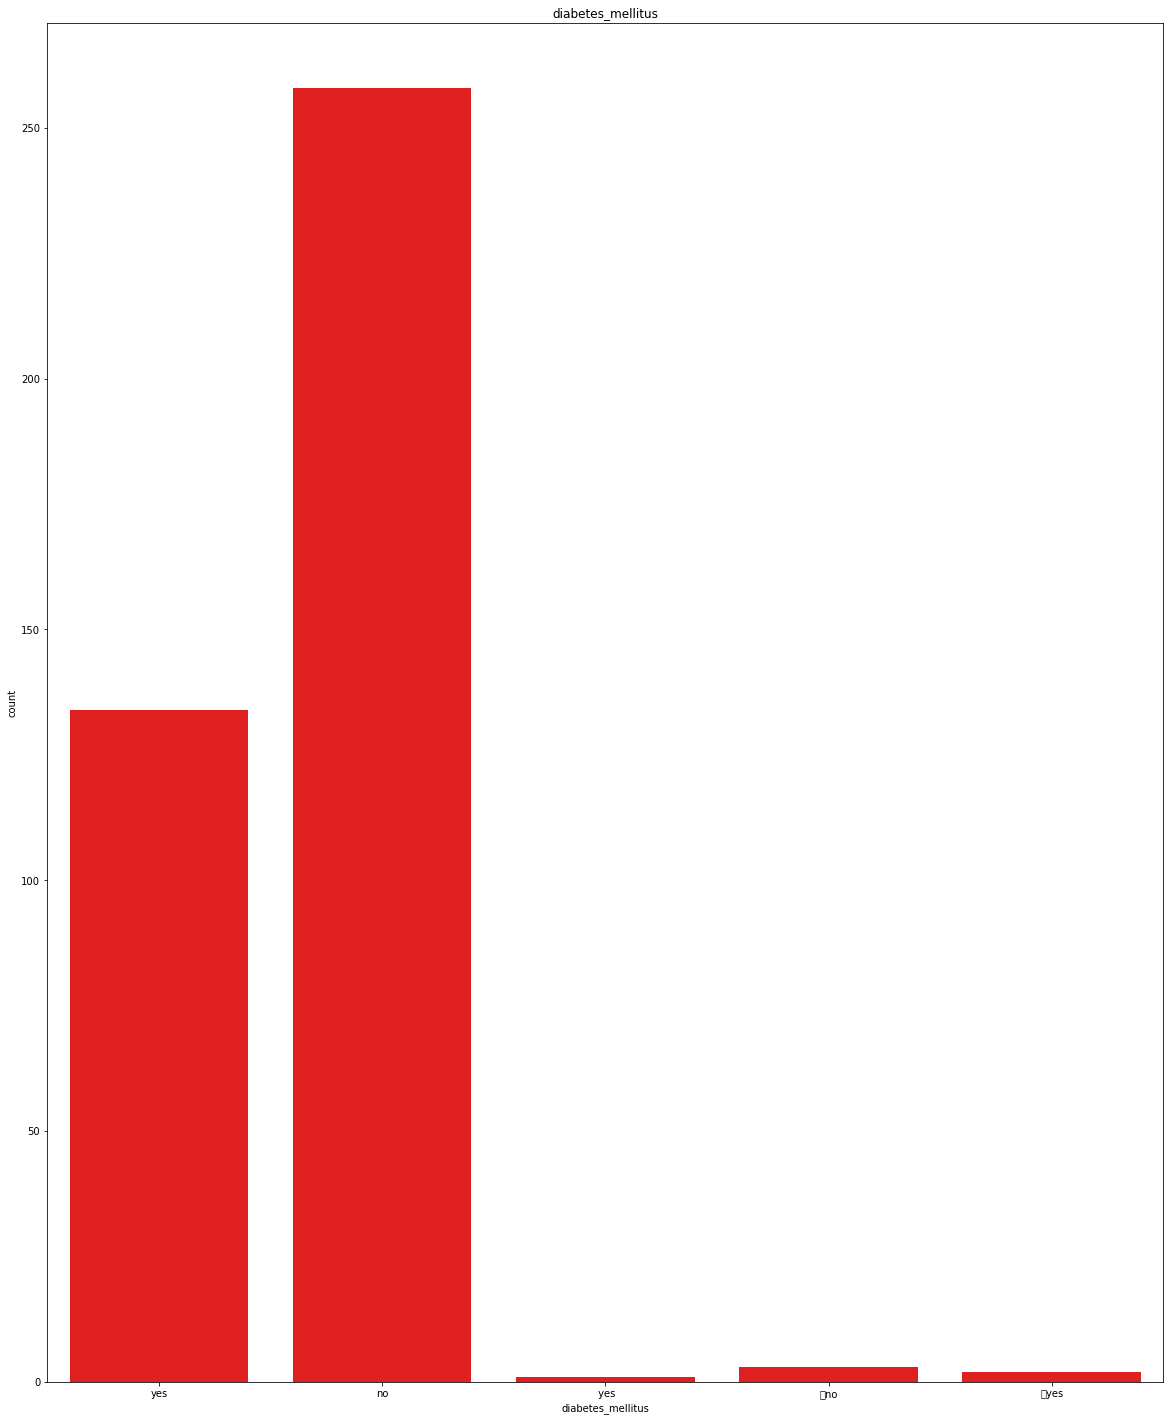

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


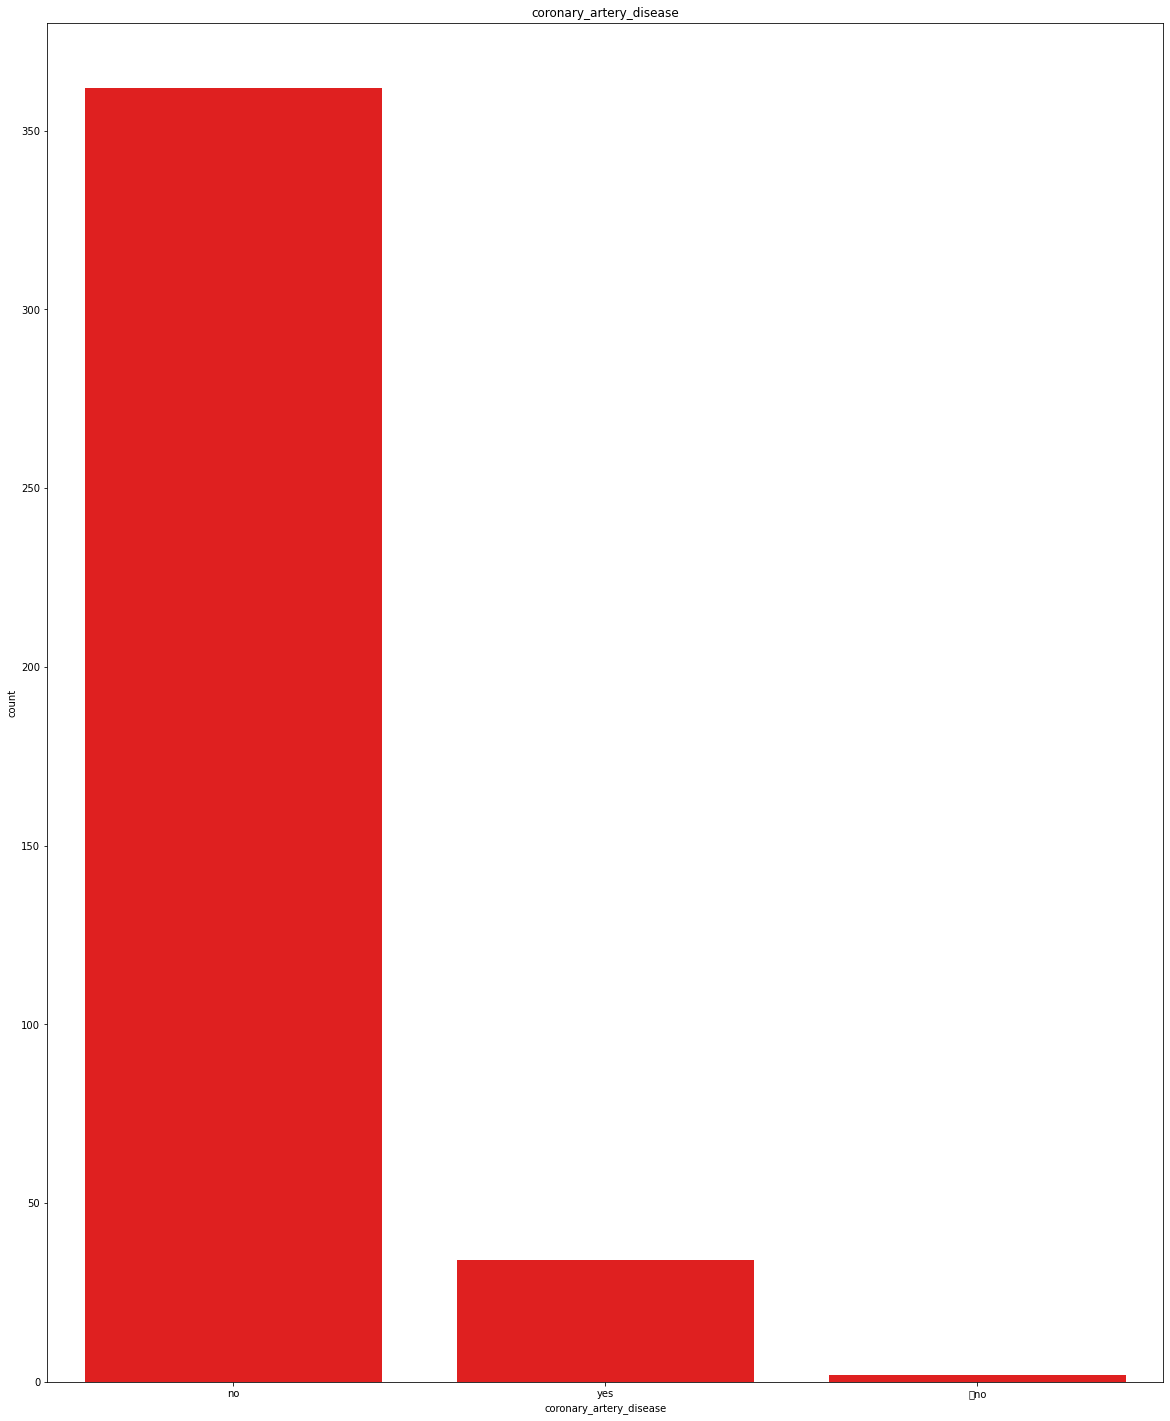

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


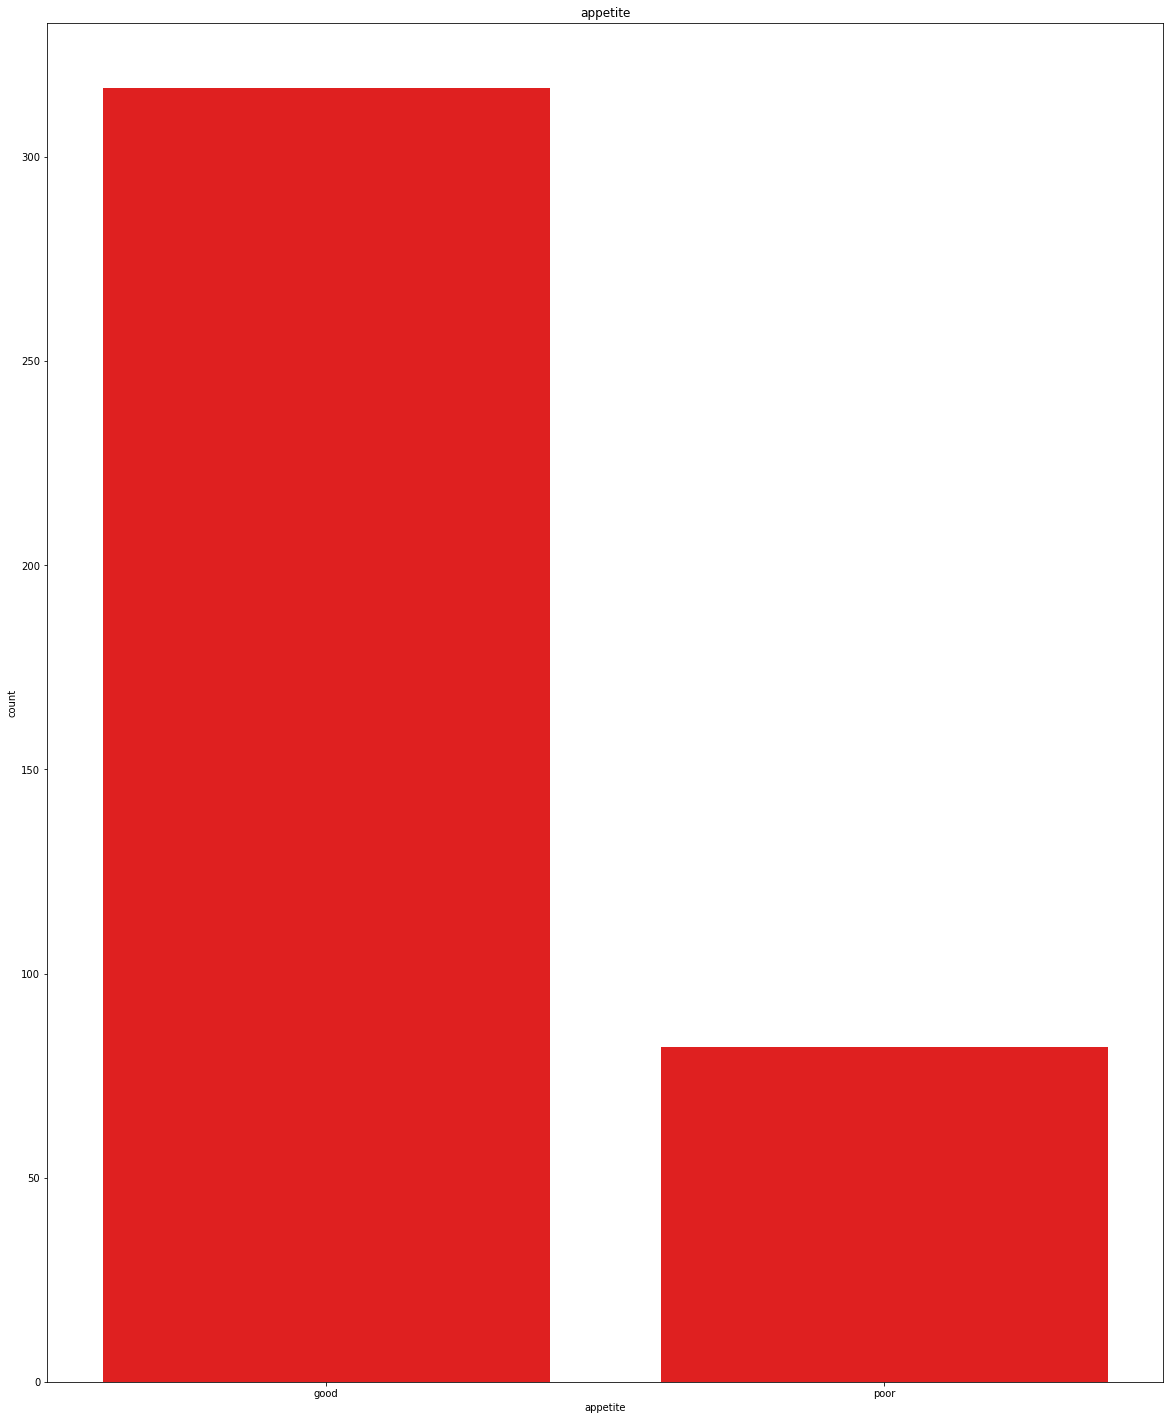

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


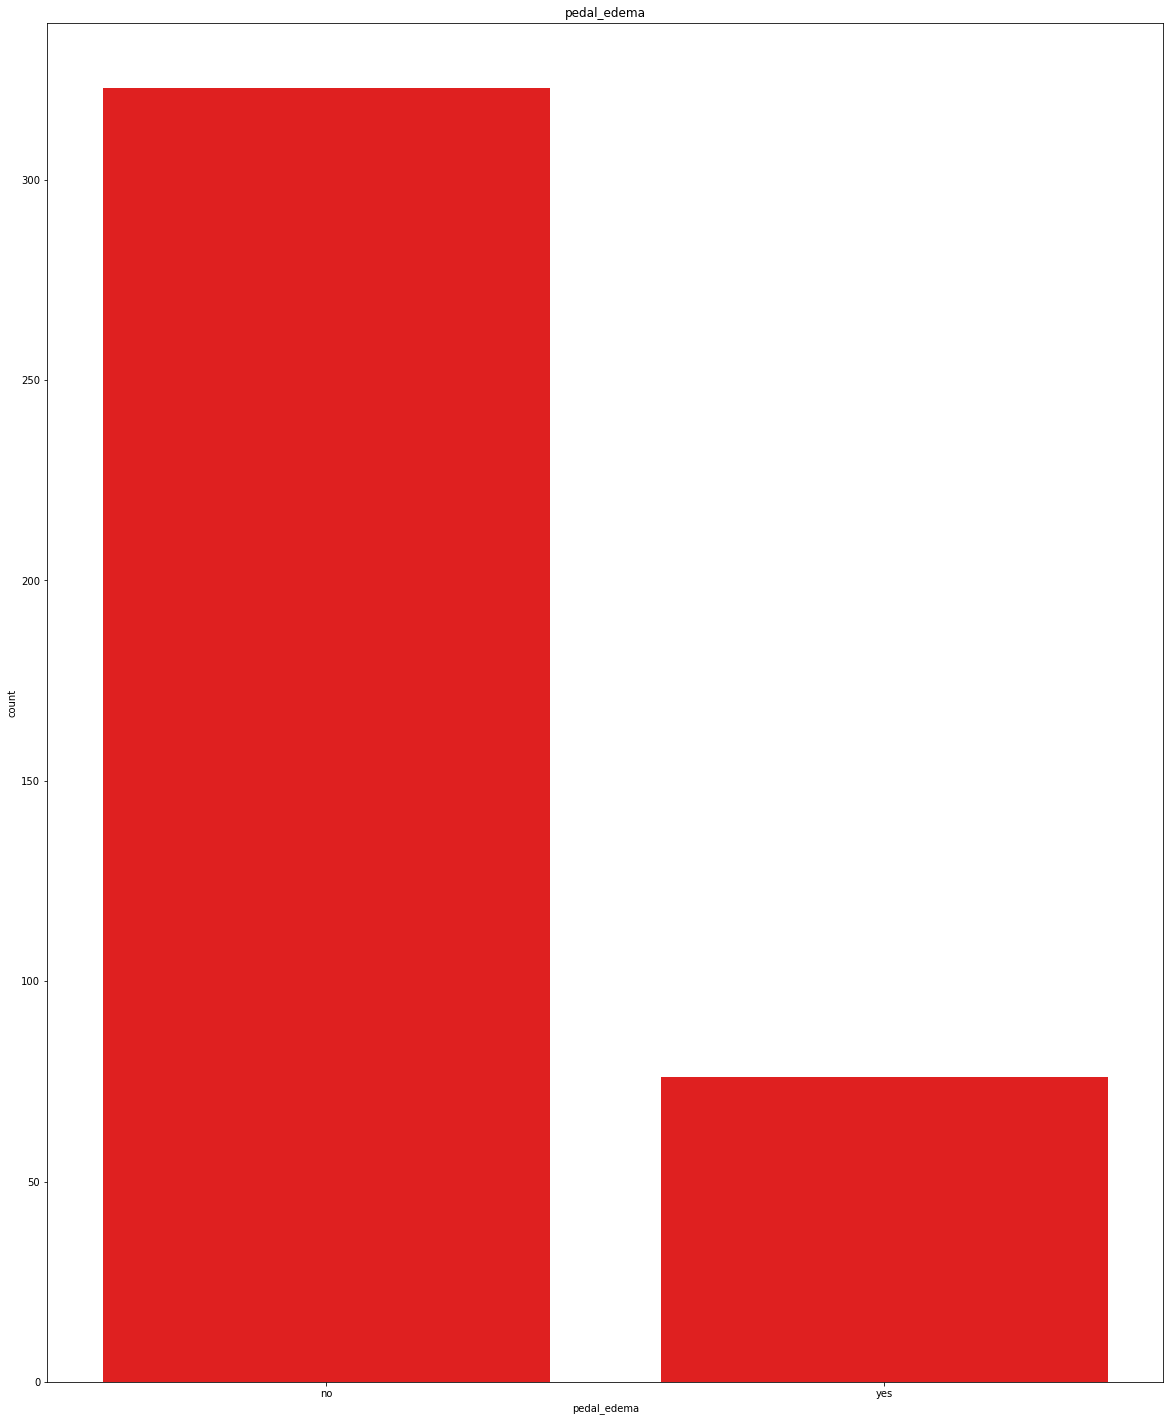

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


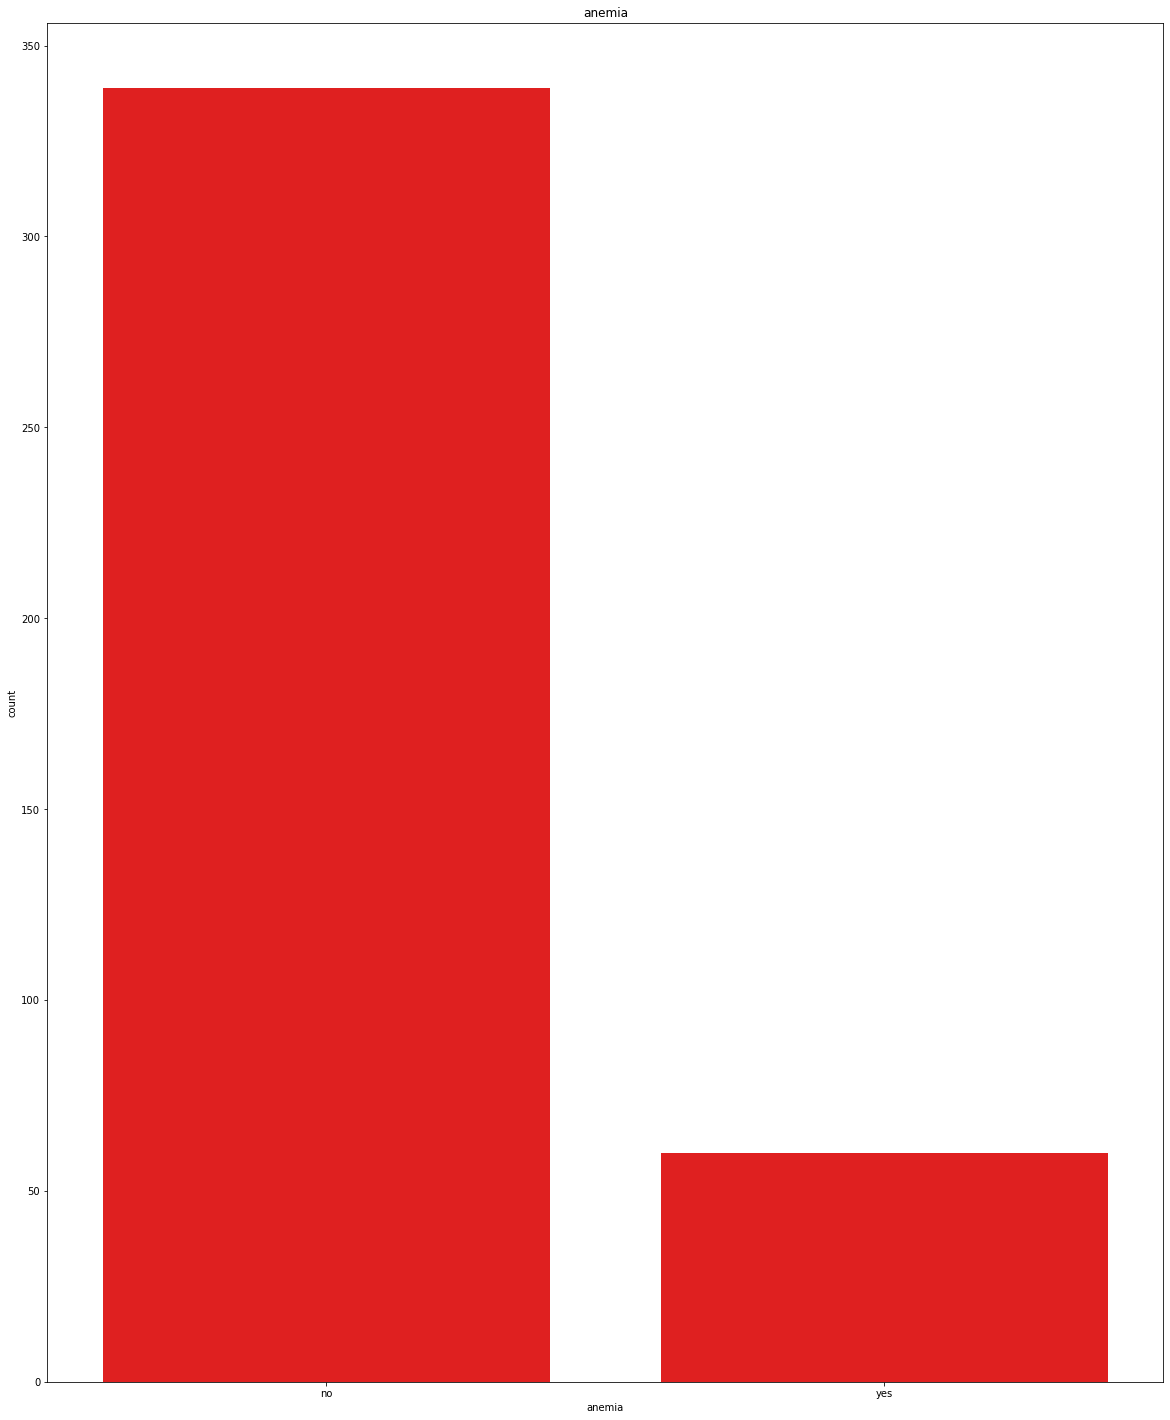

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


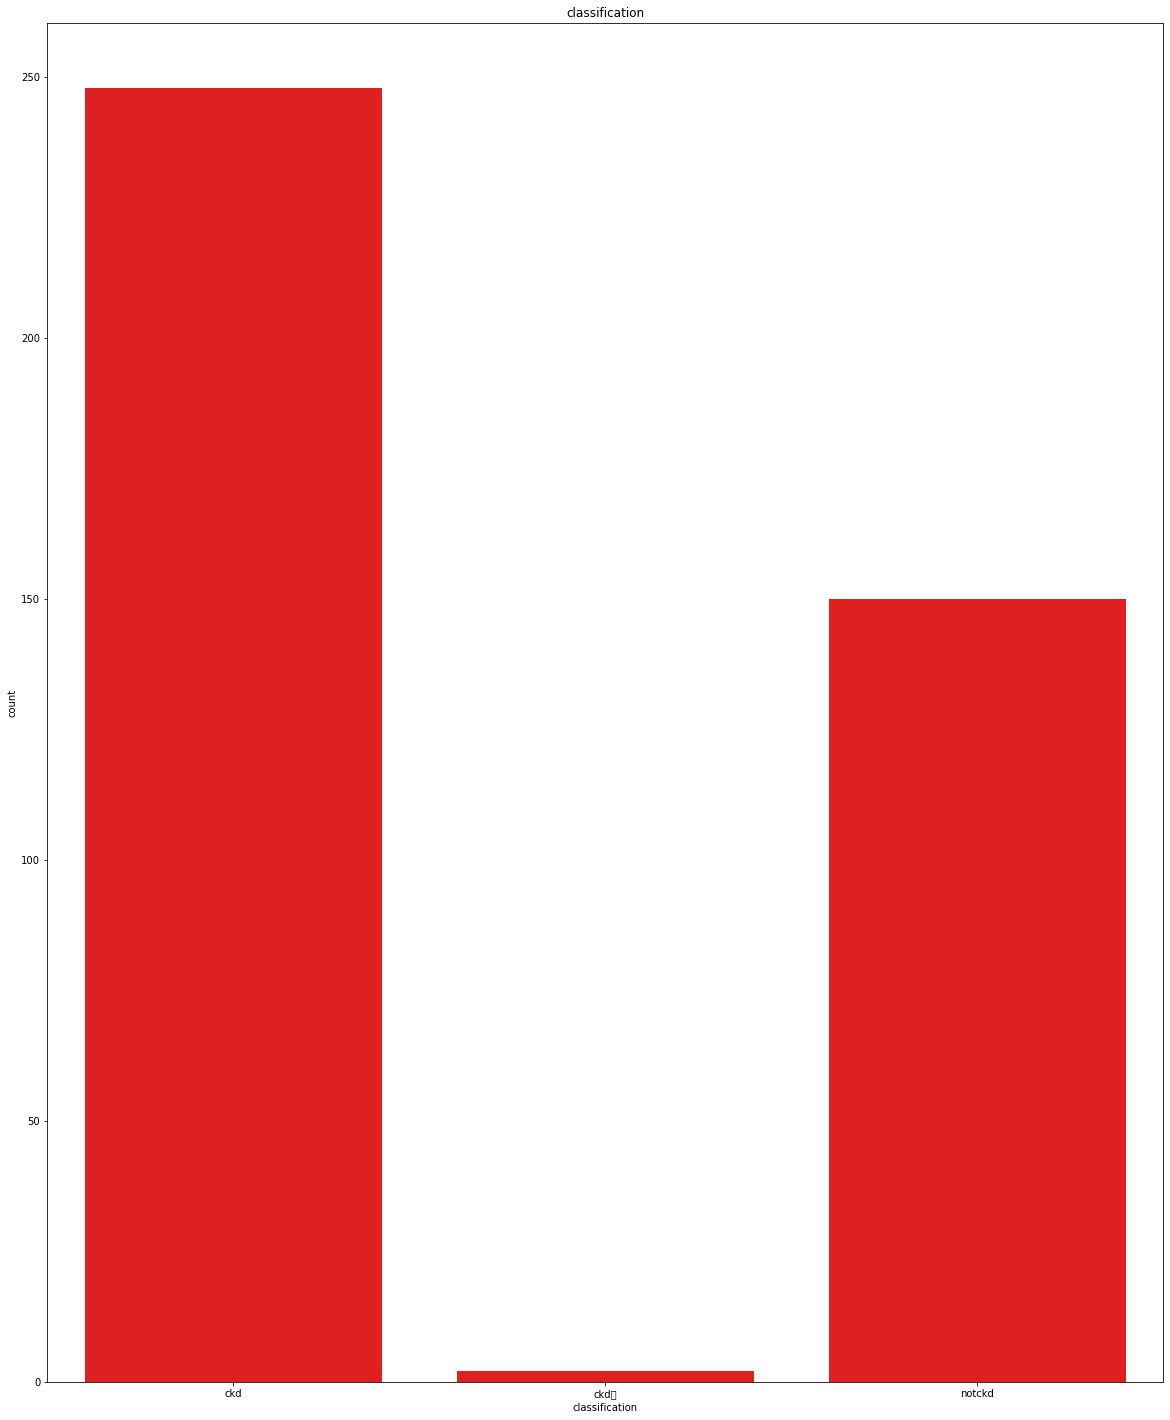

In [32]:
for i,col in enumerate(cat_names):
    plt.figure(figsize = (20,25))
    sns.countplot(df[col],color = 'blue')
    sns.countplot(data[col],color = 'red')
    plt.title(col)
    plt.show()

**almost same**

## 3. Inconsistent

In [33]:
features = [col for col in df.columns]

In [34]:
def unique_features(df):
    for col in features:
        print(f'{col} has {df[col].unique()}')
        print('\n')

In [35]:
unique_features(df)

age has [48.  7. 62. 51. 60. 68. 52. 53. 50. 63. 40. 47. 61. 42. 75. 69. 73. 70.
 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64. 56. 74. 38.
 58. 71. 34. 17. 55. 12. 43.  5. 41. 57.  8. 39. 66. 81. 27. 83. 21. 30.
  6. 32. 80. 49. 90. 78. 33. 37. 23. 25. 19. 24. 20. 29. 22. 28. 79. 36.]


blood_pressure has [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]


specific_gravity has [1.02  1.01  1.005 1.015 1.025]


albumin has [1. 4. 2. 3. 0. 5.]


sugar has [0. 3. 4. 1. 2. 5.]


red_blood_cells has ['normal' 'abnormal']


pus_cell has ['normal' 'abnormal']


pus_cell_clumps has ['notpresent' 'present']


bacteria has ['notpresent' 'present']


blood_glucose_random has [121.  79. 423. 117. 106.  74. 100. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173. 102.  95. 192. 108. 156. 264. 123.  93. 107.
 159. 140. 171. 270.  92. 137. 241. 133. 204. 207. 124. 105. 144.  91.
 162. 246. 253. 141. 182.  86. 150.  87. 112. 250. 360. 163. 129. 158.
 165. 132. 104. 127. 415. 

**from oabove observatiion these columns has inconsistent values**

diabetes_mellitus has ['yes' 'no' '\tno' '\tyes']

coronary_artery_disease has ['no' 'yes' '\tno']

classification has ['ckd' 'ckd\t' 'notckd']


we will replace these values

'\tno' : 'no'

'\tyes' : 'yes'

'ckd\t' : 'ckd'

In [36]:
df["diabetes_mellitus"] = df["diabetes_mellitus"].replace(to_replace = {'\tno' : 'no' , '\tyes' : 'yes'} )

In [37]:
df["coronary_artery_disease"] = df["coronary_artery_disease"].replace(to_replace = {'\tno' : 'no' } )

In [38]:
df["classification"] = df["classification"].replace(to_replace = {'ckd\t' : 'ckd' } )

In [39]:
unique_features(df)

age has [48.  7. 62. 51. 60. 68. 52. 53. 50. 63. 40. 47. 61. 42. 75. 69. 73. 70.
 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64. 56. 74. 38.
 58. 71. 34. 17. 55. 12. 43.  5. 41. 57.  8. 39. 66. 81. 27. 83. 21. 30.
  6. 32. 80. 49. 90. 78. 33. 37. 23. 25. 19. 24. 20. 29. 22. 28. 79. 36.]


blood_pressure has [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]


specific_gravity has [1.02  1.01  1.005 1.015 1.025]


albumin has [1. 4. 2. 3. 0. 5.]


sugar has [0. 3. 4. 1. 2. 5.]


red_blood_cells has ['normal' 'abnormal']


pus_cell has ['normal' 'abnormal']


pus_cell_clumps has ['notpresent' 'present']


bacteria has ['notpresent' 'present']


blood_glucose_random has [121.  79. 423. 117. 106.  74. 100. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173. 102.  95. 192. 108. 156. 264. 123.  93. 107.
 159. 140. 171. 270.  92. 137. 241. 133. 204. 207. 124. 105. 144.  91.
 162. 246. 253. 141. 182.  86. 150.  87. 112. 250. 360. 163. 129. 158.
 165. 132. 104. 127. 415. 

In [48]:
df.to_csv("kidney_disease_cleaned.csv")

In [46]:
df.reset_index(drop = True , inplace = True)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,137.0,5.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,79.0,18.0,0.8,147.0,4.7,11.3,38.0,6000.0,3.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,139.0,4.1,9.6,31.0,7500.0,5.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,135.0,4.7,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
351,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
352,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
353,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
